In [15]:
import cv2
# Chargez l'image et convertissez-la en niveaux de gris
img = cv2.imread('grace_hopper.jpg')
print("Dimensions de l'image : ", img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Dimensions de l'image :  (600, 512, 3)


In [16]:
# Chargez le classificateur de visage pré-entraîné (un fichier XML)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# on verifie que le modèle a bien été chargée
if face_cascade.empty()==True :
    print("Le fichier n'est pas chargé :", face_cascade.empty())
else :
    print( "Le fichier est bien chargé.")


Le fichier est bien chargé.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,535 (4.92 MB)

 Trainable params: 429,511 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 859,024 (3.28 MB)

1 visages detectés dans l'image.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Emotion prédite : happy


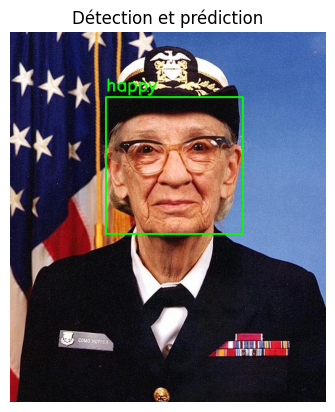

In [17]:
# Détectez les visages dans l'image en niveaux de gris :
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
model_loaded = tf.keras.models.load_model("Model_CNN_faces.keras")
model_loaded.summary()
faces = face_cascade.detectMultiScale(gray, 1.1,5)
print(f"{len(faces)} visages detectés dans l'image.")
emotion_labels = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
for (x,y,w,h) in faces:
    face=gray[y:y+h,x:x+w]
    face_resized=cv2.resize(face,(48,48))
    # Prétraitement :
    face_input = face_resized / 255.0
    face_input = np.expand_dims(face_input, axis=0)  # forme (1,48,48)
    face_input = np.expand_dims(face_input, axis=-1) 
    face_input = np.repeat(face_input, 3, axis=-1)  # convertir en 3 canaux
    # Prédiction :
    prediction = model_loaded.predict(face_input)
    emotion_index = np.argmax(prediction)
    emotion = emotion_labels[emotion_index]
    print("Emotion prédite :", emotion)

    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
# Affichage avec matplotlib
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Détection et prédiction')
plt.show()

